In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [2]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
            'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
            'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [3]:
dataset_list = list(zip(Outlook, Temperature, Humidity, Wind, Play))
dataset = pd.DataFrame(dataset_list, columns = ["Outlook", "Temperature", "Humidity", "Wind", "Play"])
print("Number of examples and feature:", dataset.shape)
dataset.head()

Number of examples and feature: (14, 5)


,Outlook,Temperature,Humidity,Wind,Play
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play         14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [5]:
dataset.describe()

,Outlook,Temperature,Humidity,Wind,Play
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,Normal,False,Yes
freq,5,6,7,8,9


In [6]:
start = "\033[1m"
end = "\033[0;0m"

print(start + "Unique Outlook values: " + end, dataset['Outlook'].unique())

print(start + "\nUnique Temperature values: " + end, dataset['Temperature'].unique())

print(start + "\nUnique Humidity values: " + end, dataset['Humidity'].unique())

print(start + "\nUnique Wind values: " + end, dataset['Wind'].unique())

print(start + "\nUnique Play values " + "\033[91m (Class Label): " + end, dataset['Play'].unique())

Unique Outlook values:  ['Rainy' 'Overcast' 'Sunny']

Unique Temperature values:  ['Hot' 'Mild' 'Cool']

Unique Humidity values:  ['High' 'Normal']

Unique Wind values:  ['False' 'True']

Unique Play values  (Class Label):  ['No' 'Yes']


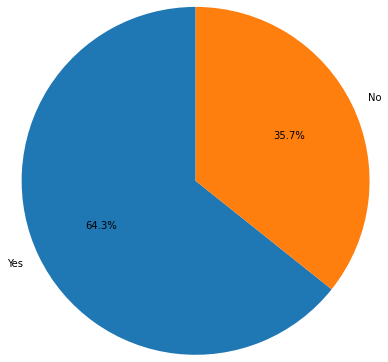

In [7]:
pie_chart = dataset['Play'].value_counts().plot.pie(autopct = "%1.1f%%", radius = 2, startangle = 90)
pie_chart.set_ylabel('')
plt.show()

In [8]:
dummy = pd.get_dummies(dataset.iloc[:,:-1])

cols = dataset.columns.tolist()
cols.remove("Play")

dataset = dataset.drop(cols, axis = 1)
dataset = pd.concat([dummy,dataset], axis = 1)

In [9]:
print("\n\nFinal dataset :\n")
dataset.head()



Final dataset :



,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_False,Wind_True,Play
0,0,1,0,0,1,0,1,0,1,0,No
1,0,1,0,0,1,0,1,0,0,1,No
2,1,0,0,0,1,0,1,0,1,0,Yes
3,0,0,1,0,0,1,1,0,1,0,Yes
4,0,0,1,1,0,0,0,1,1,0,Yes


In [10]:
print("\nLabel\n\n")
labels = dataset['Play']
labels


Label




0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play, dtype: object

In [11]:
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(dataset.iloc[:,:-1],
                        labels, test_size = 0.30, random_state = 2)
# set Random state of model equals to your roll number

In [12]:
DT = DecisionTreeClassifier(max_leaf_nodes = 2, random_state = 2) # roll no 2
# as max_leaf_nodes is less i.e 2 ...model might underfit

# fitting the model or training
final_model = DT.fit(data_train,target_train)

In [13]:
# testing
target_predict = DT.predict(data_test)

In [14]:
# Accuracy
Accuracy = accuracy_score(target_test, target_predict)
print("Accuracy:", Accuracy)

Accuracy: 0.6


In [15]:
# Confusion Matrix
cm = confusion_matrix(target_test, target_predict)
print("Confusion Matrix:\n")
cm

Confusion Matrix:



array([[1, 1],
       [1, 2]], dtype=int64)

In [16]:
# Precision
precision = precision_score(target_test, target_predict, average=None)
print("Precision:\n")
precision

Precision:



array([0.5       , 0.66666667])

In [17]:
# Recall
recall = recall_score(target_test, target_predict, average=None)
print("Recall:\n")
recall

Recall:



array([0.5       , 0.66666667])

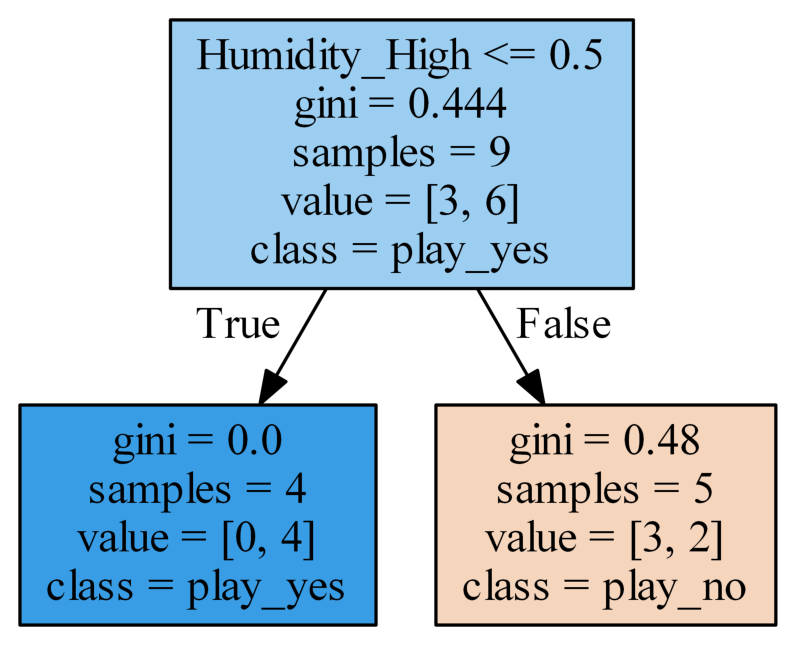

In [18]:
from sklearn.tree import export_graphviz

features = dataset.columns.tolist()
features.remove("Play")

export_graphviz(DT,out_file='onehot_tree_entropy.dot',
               feature_names=features,
               class_names=['play_no','play_yes'], 
               filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'onehot_tree_entropy.dot', '-o', 'onehot_tree_entropy.png', '-Gdpi=600'], shell=True)

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('onehot_tree_entropy.png'))
plt.axis('off')
plt.show()

**(1) What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?**

In [19]:
'''
Rainy = 0,1,0
Mild = 0,0,1
Normal = 0,1
False = 1,0
'''
q1 = [0,1,0,0,0,1,0,1,1,0]

**(2) What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’, and Wind = ’True’?**

In [20]:
'''
Sunny = 0,0,1
Cool = 1,0,0
High = 1,0
True = 0,1
'''
q2 = [0,0,1,1,0,0,1,0,0,1]

In [21]:
features = dataset.columns.tolist()
features.remove("Play")
df = pd.DataFrame([q1,q2], columns = features)
df.head()

,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_False,Wind_True
0,0,1,0,0,0,1,0,1,1,0
1,0,0,1,1,0,0,1,0,0,1


In [22]:
ans = DT.predict(df)
print("Play predicted:\nq1: {}\nq2: {}".format(ans[0],ans[1]))

Play predicted:
q1: Yes
q2: No
